In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 1. Differential Privacy Requires the Right Parameters For Your Database!

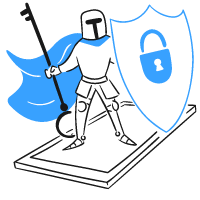

In [1]:
from IPython import display
display.Image("./images/streamlinehq-protect-privacy-4-users-200.PNG")

### What are the parameters required for differential privacy?

#### The first parameter is epsilon. What does it do?


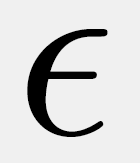

In [11]:
from IPython import display
display.Image("./images/epsilon.png")

 - Epsilon or $\epsilon$, is one of two key parameters that needs to be set to ensure the appropriate level of privacy in a database.

 - $\epsilon$ is the parameter that sets the level of the privacy guarantee and the level of utility of the results returns from queries to the database.
 
- By adding probabilistic noise to the outcome of the mechanism just enough uncertainty is added to mask the membership of any one record in the database. 

- $\epsilon$ is the parameter that determines how much noise is added to the outcome.


- Changes in $\epsilon$  will impact both the privacy guarantees afforded to the members of the database and the utility of the information and insights available from the data.

#### Why not set $\epsilon$ as high as possible? 

**All usefulness of the query result is lost!**

The answer to a query will be so noisy, so skewed from the actual answer most of the time, that no isights will be able to be gained.

So balancing privacy with utility is the key!

#### Selecting Epsilon for the Right Level of Privacy and Utility

- Simply put $\epsilon$ is a measure of **privacy loss**.  

- Thus, higher epsilon values translate to lower privacy.  

- A ‘good’ $\epsilon$ value should be low and at the same time maintain a certain level of utility of the answers provided by the DP mechanism. 

- SMPP offeres $\epsilon$ ranges between .1 and 4, a reasonably practical range 

- $\epsilon$ ranges higher than 4 offer diminishing privacy guarantees so much so as to be non-existent

- $\epsilon$ values below 1 tend to diminish utility to the point of being impractical (so much noise in the answer its not helpful)

- SMP offers $\epsilon$ offers values to be set by .1 increments 


#### A Look at the Mathematical Relationship Between $\epsilon$ and Privacy

- Very generally privacy guarentees are met by bounding the differences in the probabilities of outcomes amoung and query to two databases that differ by only one record.

- Bounding this difference protects individual records.

- $\epsilon$ is a setting, a knob to turn, so to speak, that is **exponentially** related to the privacy in a differentially private database

- Turning up $\epsilon$ one whole number, say from 1 to 2, decreases privacy by a factor of e, or 2.718 (all other paramters held equal)

- The mathematics of differntial privacy make changing $\epsilon$ from 1 to 5 make the probability of an outcome being returned by a Laplace mechanism over 100 times more likely.  Thus if initially an outcome was less than 3% likely with an $\epsilon$ value of 1 it is over 100% (not private at all) with an $\epsilon$ of 5



#### Putting the Choice of $\epsilon$  Into Practice

The trade-off between utility and privacy is a inverse relationship.  At a high level, as a general concept by the following illustration.

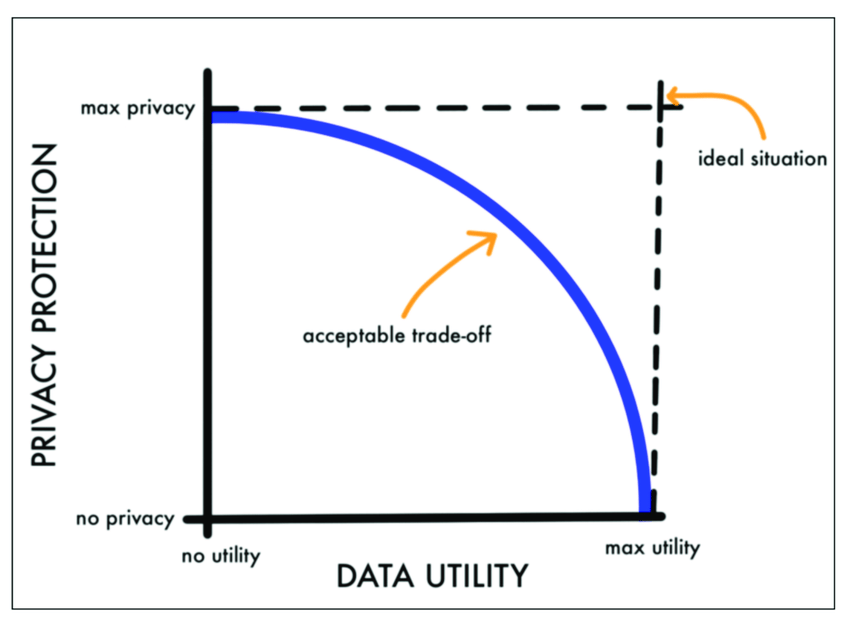

In [16]:
display.Image("./images/trade-off-between-privacy-and-utility.png", width = 300, height = 150)

- The idea is to find the point in the trade-off that is right for each database and use case.
- There is no exact right answer! The choice depends on the application.
- However, examples from practical research and existing implementatinos can guide the choice.
- The key is to find the point where the acceptable privacy and acceptable utility meet.
- Utility depends on acceptable accuracy for a particular use case.
- But acceptable ranges of epsilon tend to be centered around $\epsilon$ = 1
- Below is an example of an actual experiment with varying values of $\epsilon$ and the resulting accuracy of a Bayesian calssifier mode.

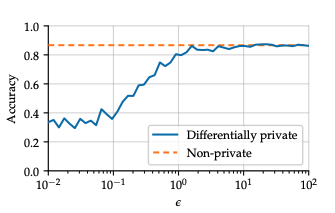

In [219]:
display.Image("./images/Trade-off-between-privacy-and-utility-3.png")

- This actual use case illustrates a common accuracy trade-off with increasing $\epsilon$
- Notice there is very little accuracy gain for $\epsilon$ > 4
- Notice there is very little accuracy loss for $\epsilon$ < .1

#### A Simple Example: Oski (Go Bears!) and the Balding Brown Bears

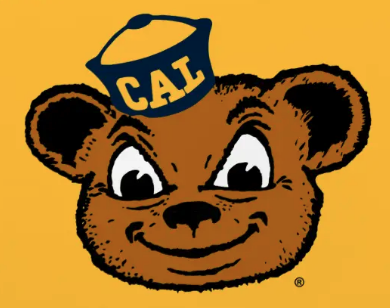

In [21]:
display.Image("./images/oski.png")

- Consider a database of the dietary habits of brown bears
- When the salmon are running large, talented and strong brown bears can catch in excess of 30 salmon per day
- Lesser talented bears tend to collect and eat inexcess of 10 - 20 salmon per day


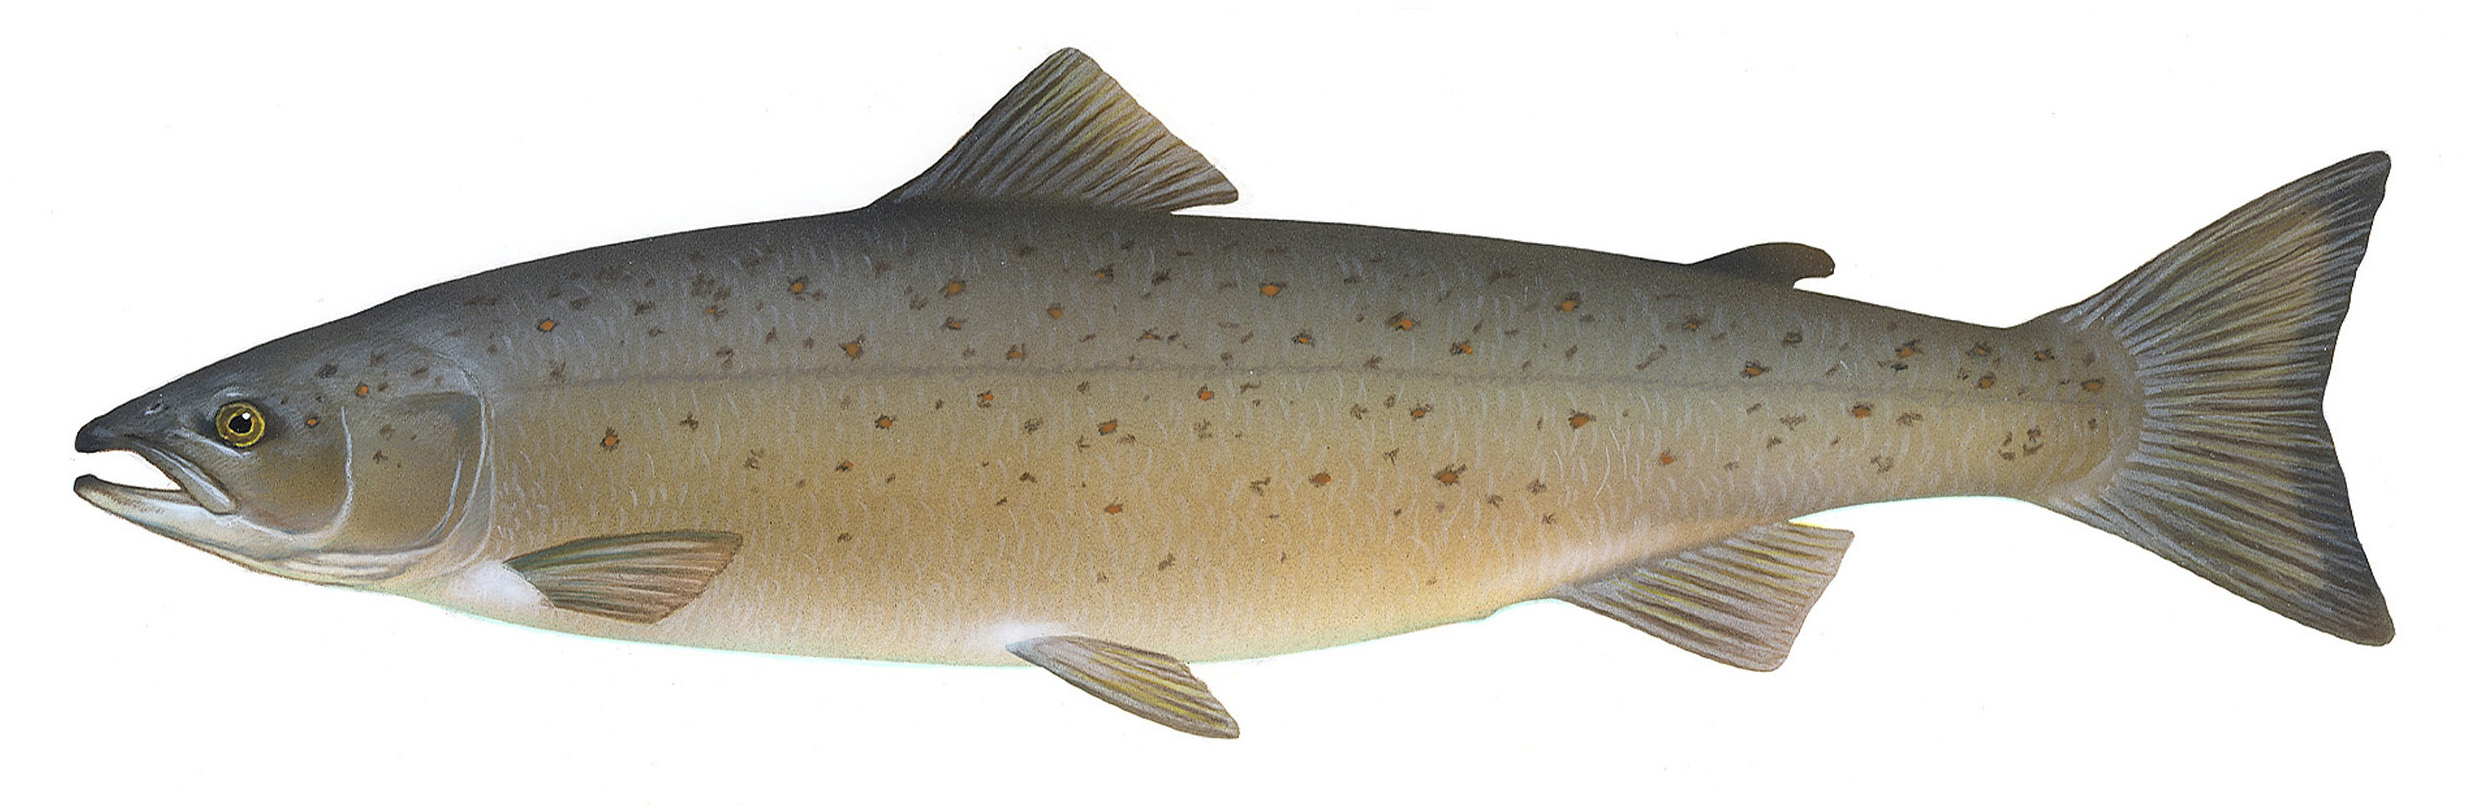

In [25]:
display.Image("./images/Salmo_salar.jpeg", width = 200, height = 100)

#### Suppose we have a database of ten bears, all somewhat average brown bears who are all balding.
The sensitive information here is that membership in this database reveals that in fact the bears are losing their fur!

1. Avalanche (Kutztown)
2. Bananas (U of Maine)
3. Benny (Morgan State)
4. Boomer (Lake Forest)
5. Grizz (Oakland)
6. Kody (Cascadia)
7. Monte (U Montana)
8. Nanook (Bowdoin)
9. Ranger (Drew)
10. Scott Highlander (UC Riverside)

#### On a particular day, July 30, when the salmon are running the database records the following number of fish captured by this group.

[10, 13, 14, 12, 18, 14, 18, 17, 16, 12]

**The eating habits of this entire group falls within a reasonable range of "normal" brown bear daily catches!**


What if we want to understand some statistics about this group of bears without divulging the actual catches of a particular brown bear?

The true average is 14.4

Using a Laplacian mechanism with **$\epsilon$ = 1**, we ask what is the differntially private average catch on July 30th?

 With 10 runs of the Laplacian Diffierential Privacy Mechanism the noisy average output is
 
 - 15.05
 - 10.56
 - 17.80
 - 12.74
 - 12.01
 - 17.15
 - 22.76
 - 11.34
 - 12.28
 - 15.89
 
 Here the MSE or mean square error of the 10 query results from the true average is **12.78**. That is a lot of noise relative to the true average!

Using a Laplacian mechanism with **$\epsilon$ = 4**, we ask what is the average catch on July 30th?

With 10 runs we see a much tigher band around the true answer. With higher $\epsilon$ comes lower protection of privacy.

Figure 1

- 14.51
- 14.80
- 14.75
- 13.45
- 15.63
- 13.36
- 16.20
- 12.93
- 12.97
- 13.87

Here the Mean Square Error of the 10 query results is **.11**.  The actual query results are close to the true answer.

The choice of $\epsilon$ boils down to tolerable error in the results for a given dataset, balanced against privacy considerations.

Here we considered only the utility privacy trade-off for a pretty homegeneous group of bears. From this example, given that all bears ate an amount of salmon in the range of 10-18, it is pretty hard to figure out under either $\epsilon$ value whether any particular bear is in the data set.  This distribution of data, fairly homogeneous in nature motivates a lower privacy gaurantee and more utility!  

But what if we needed to protect the privacy of outlier bear we well, one such as Oski? 
What if the database had to protect outliers? 

For example, **Oski the Cal Bear** is a giant among bears.  

What if we have auxillary information about Oski?  Namely, true to his school population he is talented, competitive, clever, and innovative. He may be able to catch **40-50** salmon a day when they are running!


Let's add Oski to the database. Yes, it is a little known fact that Oski needs a fur transplant. Yet we want to add him to the study of dietary habits and their implications for bear fur retention.

To keep the fact that Oski is in this database private, it will take more work from $\epsilon$!

Suppose Oski records 48 salmon caught on July 30th? Look at the results with $\epsilon$ = 4. The true average with Oski is $17.46$.

- 17.96
- 17.24
- 21.27
- 16.39
- 18.07
- 17.54
- 17.35
- 17.48
- 18.05
- 17.17

Campare these results with Figure 1, where Oski is not in the database.  With high probabiity the noisy average with $\epsilon$ = 4 reveals with high probability a bear who is a giant eater is in the database.  We know Oski is a skilled, voracious hunter.  Oski is probably in the database.

Outliers like Oski in a database need lower values of $\epsilon$ to mask their membership and thus protect their senstive attributes.


What if we want to effectively mask Oski's membership in the database? What $\epsilon$ value would we need to accomplish this?

Look what happens if we choose $\epsilon$ = .5 and run the Laplace Mechanism 10 times before and after Oski is in the database.

Recall the true average without Oski is 14.4 and with Oski is 17.46.


Before:

- 4.0
- 28.53
- 16.04
- 14.11
- 35.73
- 32.66
- 11.89
- 10.09
- 10.58
- 38.85

After:

- 15.01
- 15.59
- 14.66
- 14.74
- 12.18
- 47.22
- 21.04
- 32.38
- 11.68
- 20.72

With an $\epsilon$ = .5 the MSE between the cases where Oski is in the database and not in the database the MSE is 103 and 110 respectively.
The values are so noisy as to make the probabilty of learning of his presense in the database highly unlikely!

But notice the noise in the average values.  Still, the $\epsilon$ makes Oski's membership virtually impossible to ascertain!

#### Observations on $\epsilon$:

- The value for $\epsilon$ depends on the level of privacy needed for a particular use case:

    - Both the variablity of the data and level of protection desired drives the choice.  
    - If the range of the data is not highly variable, $\epsilon$ can be higher, imparting more accuracy.  If the use case needs less protection for outliers, because they may not even be possible in the data, use of a higher value of $\epsilon$ 
    - However, if protection must extend to extreme cases in the database, $\epsilon$ must be much lower, typically between 1 and 0.


- There is a hefty loss of utility between 1 and 4.  We saw at .5 utility of the average was highly impaired possibliy to the point of being useless. Tolerable utility degradation is use case specific, data specific.

- Parameter tuning and privacy decision must be made carefully, with study anbd experimentation on the database itself.

# 2. Play with the Laplace Privacy Mechanisms, Understand the Parameter $\Delta$

In this section we expose the Differential Privacy Mechanisms for you to use.  Here we introduce the second key parameter to enable DIfferential Privacy guarantees.  Let's start with a bery simple example of injecting noise to a single number.  From this exercise you can see the masking effect of preturbing a number to disguise its actual value just enough to meet the formal privacy guarantees offered by Differential Privacy techniques.

### 2.1 What does adding "noise" from the Laplacian Distribution do to a single number?

In [413]:
def laplaceMechanism(x, epsilon, sensitivity):
    noisyX =  np.random.laplace(x, 2*sensitivity/epsilon, 1)[0]
    return noisyX

Laplacian Mechanism takes a single number and adds Laplacian noise to its true value and returns the "noisy", disguised number.

First pick a number, x.  Then lets add some Laplacian noise to it and see what happens.

We choose an example value of 0.  Once you read through our analysis, you choose different values to run the functions and visualizations.

In [414]:
x = 0

Generally, a Laplace mechanism has 3 parameters:

- mu = $\mu$ or center of the Laplace function itself, here the true number x.
- epsilon = $\epsilon$ is the privacy leakage of the query (We explored $\epsilon$ in the previous section holding sensitivity constant)
- sensitivity = $\delta$ is query dependent and is the potential difference in the outcome of a query for two databases that differ by 1 record

First, choose parameters to disguise our number x.  
Choose a high level of privacy by setting $\epsilon$ low (high privacy = low leakage). 
Center the noise we generate around our input number x.

In [415]:
# Choose parameters with very low epsilon (little privacy leakage)
# mu = x
mu = 0
epsilon = .5
sensitivity = 1

In [431]:
# What happens to your x-value?
noiseNum = laplaceMechanism(x, epsilon, sensitivity)
print(noiseNum)

-6.48256061709564


Let's generate 1000 different random samples of your x values with this low epsilon.

Then plot the distribution around the x value.

What should the distribution look like? 

In [432]:
noiseNums = []
for i in range(10000):
    noiseNum = laplaceMechanism(x, epsilon, sensitivity)
    noiseNums.append(noiseNum)

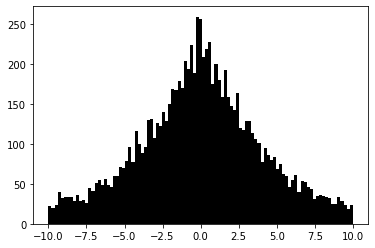

In [433]:
binBoundaries = np.linspace(-10,10,100)
plt.hist(np.asarray(noiseNums, dtype='float'), bins=binBoundaries, color = 'k')
plt.show()

This sample distribution should converge to the underlying distributon around the actual x value, with many samples, here 10,000.

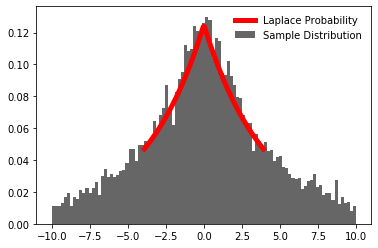

In [154]:
fig, ax = plt.subplots(1, 1)
#x = np.linspace(laplace.ppf(0.001), laplace.ppf(0.999), 100)
#ax.plot(x, laplace.pdf(x),'r-', lw=5, alpha= .5, label='laplace pdf')
rv = laplace(0, 2*sensitivity/epsilon)
ax.plot(x, rv.pdf(x), 'r-', lw=5, label='Laplace Probability ')
r = noiseNums
ax.hist(r, density=True, histtype='stepfilled', alpha=0.6, bins = binBoundaries, label= "Sample Distribution", color = 'k')
ax.legend(loc='best', frameon=False)
plt.show()


In [157]:
#Here just figuring out how to calculate the confidence interval
mean, var, skew, kurt = laplace.stats(moments='mvsk')

In [435]:
std = np.sqrt(var)
confid_high = mu + 2*std
confid_low = mu - 2*std
#This is the actual CI boundaries for 95%
print(confid_high, confid_low)

2.8284271247461903 -2.8284271247461903


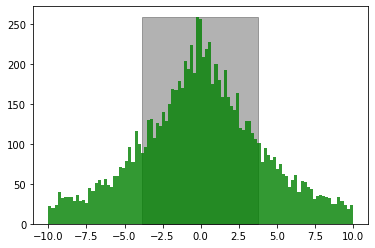

In [436]:
# This is the normal approximation, here for 50%
ci = norm(*norm.fit(noiseNums)).interval(0.50) 
height, bins, patches = plt.hist(noiseNums, alpha=0.8, bins = binBoundaries, color = 'g')
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='k', alpha=0.3) 

In [195]:
print(ci)

(-3.958171904944405, 3.8890277304790013)


This visualization shows that 50% of the time, with parameters, $\epsilon$ = .5 and sensitivity, $\delta$ = 1 the Laplace Privacy Mechanism will return a value of 4!  Now try the experiment with lower privacy, say $\epsilon$ = 4 and $\delta$ = 1

In [437]:
# Choose parameters with very high epsilon (lots of privacy leakage)
x = 0
epsilon = 4
sensitivity = 1

In [439]:
noiseNums = []
for i in range(10000):
    noiseNum = laplaceMechanism(x, epsilon, sensitivity)
    noiseNums.append(noiseNum)

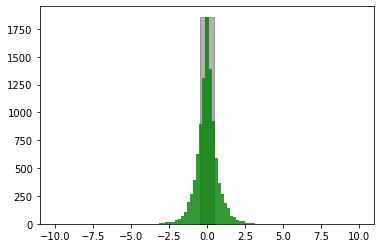

In [440]:
binBoundaries = np.linspace(-10,10,100)
ci = norm(*norm.fit(noiseNums)).interval(0.50)  
height, bins, patches = plt.hist(noiseNums, alpha=0.8, bins = binBoundaries, color = 'g')
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='k', alpha=0.3) 

#### Look at the histogram more illustrative bin boundaries.

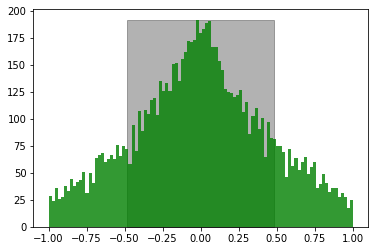

In [213]:
binBoundaries = np.linspace(-1,1,100)
ci = norm(*norm.fit(noiseNums)).interval(0.50)  
height, bins, patches = plt.hist(noiseNums, alpha=0.8, bins = binBoundaries, color = 'g')
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='k', alpha=0.3) 

In [214]:
print(ci)

(-0.481701106282169, 0.478245085000773)


### Need visual showing ration of confidence intervals..

This visualization shows that 50% of the time, with parameters, $\epsilon$ = 4 and sensitivity, $\delta$ = 1 the Laplace Privacy Mechanism will return a value of -.5  to .5, reducing the range the previous parameters produced by approximately 87.5% 

### 2.2 Explore Our Balding Bears Database and Laplace Differential Privacy Mechanism COUNT

Let's revisit differentially private gaurantees for our bears who are losing their precious fur.  Let's explore three types of queries COUNT, SUM and AVERAGE and how we can make these aggregation queries such that they provide some privacy gaurantees for our fur-challenged bears.

Recall the eating habits of our bears on July 30th, including our salmon catching star Oski.

[10, 13, 14, 12, 18, 14, 18, 17, 16, 12, 48]



In [687]:
def ANON_COUNT(col, epsilon, sensitivity):
    trueCount = np.shape(col)[0]
    noisyCount = laplaceMechanism(trueCount, epsilon, sensitivity)
    return noisyCount

For simplicity create a pandas dataframe of the balding bears.

In [442]:
#Create a dataframe of the balding bears
baldingBears = pd.DataFrame({'Bears': ['Avalanche', 'Bananas', 'Benny', 'Boomer', 'Grizz', 'Kody', 'Monte', 'Nanook', 'Ranger', 'Scott Highlander', 
                                       'Oski'],'School': ['Kutztown', 'U of Maine', 'Morgan State', 'Lake Forest', 'Oakland', 'Cascadia', 'U Montana', 
                                       'Bowdoin', 'Drew', 'UC Riverside','Berkeley'], 'Salmon':[10, 13, 14, 12, 18, 14, 18, 17, 16, 12, 48]})


In [443]:
# add 1 to each index
baldingBears.index = baldingBears.index + 1

In [444]:
baldingBears

,Bears,School,Salmon
1,Avalanche,Kutztown,10
2,Bananas,U of Maine,13
3,Benny,Morgan State,14
4,Boomer,Lake Forest,12
5,Grizz,Oakland,18
6,Kody,Cascadia,14
7,Monte,U Montana,18
8,Nanook,Bowdoin,17
9,Ranger,Drew,16
10,Scott Highlander,UC Riverside,12


In [447]:
# Choose parameters with very low epsilon (little privacy leakage)
trueCount = 11
mu = 0
epsilon = .5
sensitivity = 2
col = baldingBears['Salmon']

The true count of the number of bears in our database is $11$.  The true sum of the number of salmon eaten on July 30th is $192$
Before we dive too deep into sensitivity, note that for the COUNT query the unbounded sensitivity for a COUNT query is $1$; the bounded sensitivity is $2$.  This is the most the query answer can diverge between databases that differ by one record.  The difference between 1 or 2 depend on how yoy define difference. 

In [456]:
noisyCount = ANON_COUNT(col, epsilon, sensitivity)
print(noisyCount)                   

12.463618047279708


In [457]:
noisyCounts = []
for i in range(10000):
    noisyCount = ANON_COUNT(col, epsilon, sensitivity)  
    noisyCounts.append(noisyCount)

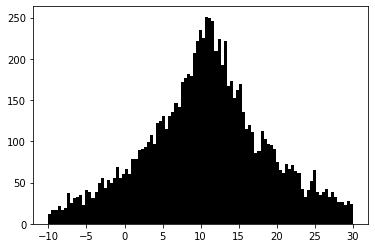

In [458]:
binBoundaries = np.linspace(-10,30,100)
plt.hist(np.asarray(noisyCounts, dtype='float'), bins=binBoundaries, color = 'k')
plt.show()

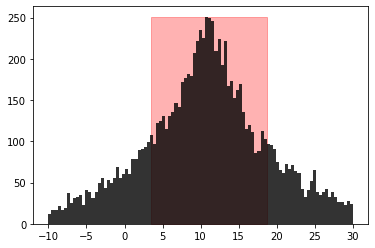

In [459]:
binBoundaries = np.linspace(-10,30,100)
ci = norm(*norm.fit(noisyCounts)).interval(0.50)  
height, bins, patches = plt.hist(noisyCounts, alpha=0.8, bins = binBoundaries, color = 'k')
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='r', alpha=0.3) 

In [305]:
# Choose parameters with very high epsilon (subsstanital privacy leakage)
trueCount = 192
mu = 0
epsilon = 5
sensitivity = 2
col = baldingBears['Salmon']

In [302]:
noisyCounts = []
for i in range(10000):
    noisyCount = ANON_COUNT(col, epsilon, sensitivity)  
    noisyCounts.append(noisyCount)

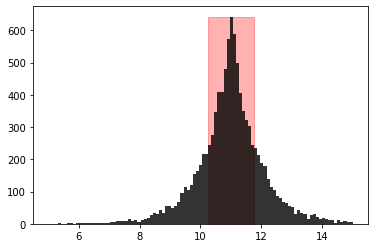

In [309]:
binBoundaries = np.linspace(5,15,100)
ci = norm(*norm.fit(noisyCounts)).interval(0.50)  
height, bins, patches = plt.hist(noisyCounts, alpha=0.8, bins = binBoundaries, color = 'k')
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='r', alpha=0.3) 

In [310]:
print(ci)

(10.242532924659958, 11.759144967107623)


Notice with the lower privacy gaurantees that there is a 50% chance that the noisyCount will fall within .7 of the true count of be within approximately 6% of the true count!  Play with the parameters and re-run the last 5 cells.

### 2.3 How the Laplace Mechanism can protect Oski's privacy for sum queries ... sensitivity $\Delta$ to the rescue.

Let's consider the database of bears without Oski in it.  Suppose we query the total of all salmon eaten by our bears.  Recall without Oski the sum is $144$. Set the parameter $\epsilon$ at 1, a fairly private setting for most use cases.   

In [474]:
def ANON_SUM(col, epsilon, u, l):
    trueSum = np.sum(col)
    sensitivity = abs(u-l)
    noisySum = laplaceMechanism(trueSum, epsilon,sensitivity)
    return noisySum

In [511]:
# Set Diffierential Privacy Parameters for Anonymous Sum
epsilon = 1
col = baldingBears_no_Oski['Salmon']
u = max(col)
l = min(col)

In [500]:
ANON_SUM(col, epsilon, u, l)

149.63193473102413

In [512]:
noisySums = []
for i in range(10000):
    noisySum = ANON_SUM(col, epsilon, u, l)  
    noisySums.append(noisySum)

In [374]:
#noisySums

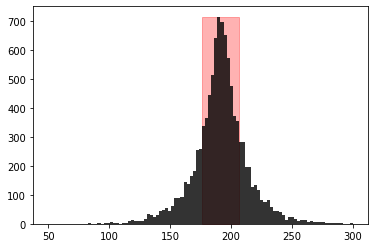

In [518]:
binBoundaries = np.linspace(50,300,100)
ci = norm(*norm.fit(noisySums)).interval(0.50)  
height, bins, patches = plt.hist(noisySums, alpha=0.8, bins = binBoundaries, color = 'k')
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='r', alpha=0.3) 

In [519]:
ci

(176.26933404544383, 207.0312465612201)

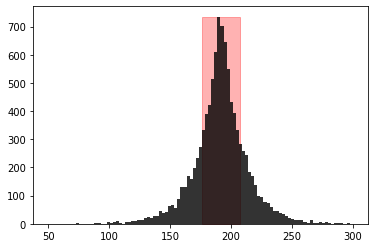

In [520]:
col = baldingBears['Salmon']

noisySums = []
for i in range(10000):
    noisySum = ANON_SUM(col, epsilon, u, l)  
    noisySums.append(noisySum)
    
binBoundaries = np.linspace(50,300,100)
ci = norm(*norm.fit(noisySums)).interval(0.50)  
height, bins, patches = plt.hist(noisySums, alpha=0.8, bins = binBoundaries, color = 'k')
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='r', alpha=0.3) 

In [521]:
ci

(176.21102599628009, 207.12134809378202)

### What can we see from these results?  

Notice that the confidence intervals at 50% do not overlap at all. Thus at least 50% of the time even with an epsilon of 1, querying the database for sum without and then with Oski it will yeild observably different results.  Any statician with her weight could quickly discern that an averous bear has been added to the database, and it could be Oski.  Oski's privacy, his balding fur, is at risk here.  Even with $\epsilon$ = 1.

### What can be done to make this aggregation query, sum, more differentially private?

Notice we set the "sensitivity" of the query as the difference between the maximum and minimum value in the database without Oski in it.  THe sensitivity was set based on a reasonably homogenous population of bears.  So when we introduced an outlier, Oski, the sensitivity parameter was not set high enough to protect him.

### Set the sensitivity to protect an outlier.

The sensitivity of a sum query is the maximum difference between the output of the query with or without any record in the database.  But in most practical use cases this difference must be estimated, guessed based on practical knowledge of a situation. In the case of our bears, to set the sensitivity to protect Oski or any voracious bear, we estimate that the maximum number of salmon any bear could catch and eat in a day is 50 salmon (just a guess).  Further a bear may begin to starve if it eats fewere than 10 salmon.  Thus, the difference between the sum with any new bear added to a database is no more than 50 and no less than 10.  Thus the sensitivity of the sum query in this situation is 40 fish, or 40.  

### Rerun the sum query with sensitivity = $40$

Recall in the previous demonstration the senstivity was set to 8, the difference between the minimum and the maximum without Oski.  Very different results are seen if we set the senstivity at our "user-defined" maximums and minimums.


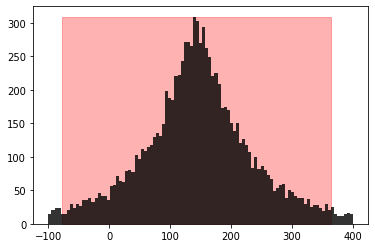

In [553]:
epsilon = 1
u = 50
l = 10
col = baldingBears_no_Oski['Salmon']

noisySums = []
for i in range(10000):
    noisySum = ANON_SUM(col, epsilon, u, l)  
    noisySums.append(noisySum)
    
binBoundaries = np.linspace(-100,400,100)
ci = norm(*norm.fit(noisySums)).interval(0.95)  
height, bins, patches = plt.hist(noisySums, alpha=0.8, bins = binBoundaries, color = 'k')
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='r', alpha=0.3) 

In [554]:
ci_no_Oski = ci
ci

(-77.82035602561567, 364.9123904646393)

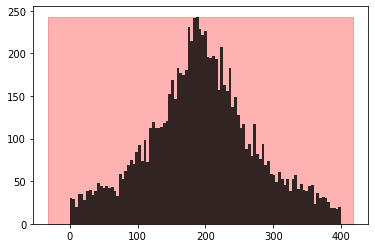

In [555]:
epsilon = 1
u = 50
l = 10
col = baldingBears['Salmon']

noisySums = []
for i in range(10000):
    noisySum = ANON_SUM(col, epsilon, u, l)  
    noisySums.append(noisySum)
    
binBoundaries = np.linspace(0,400,100)
ci = norm(*norm.fit(noisySums)).interval(0.95)  
height, bins, patches = plt.hist(noisySums, alpha=0.8, bins = binBoundaries, color = 'k')
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='r', alpha=0.3) 

In [556]:
ci_Oski = ci
ci

(-31.305869454353996, 417.24107609758516)

Observe that with 90% probability the noisy sum will fall between the range of 145 and 238 with $\epsilon$ = 4 amnd $\delta$ = 40.  Notice that this is a fairly private preserving outcome!  Why is this with $\epsilon$ so high? Outcomes should be fairly transparent, close to the true sum.  The answer lies in the high sensitivity rate set.  Here we set the sensitivity rate at user imput levels of 10 to 50 salmon eaten per day.  This was the user's best guess at the maximum and minimum amount of salmon any bear could possibliy eat in one day!  If we simply use the minimum and maximum amount of salmon detected in the database, it would be very close to this, Oski = $48$, Avalance = $10$

Here the Laplace Mechanism uses the sensitivity parameter to protect Oski's membership in the database!

But what if we took Oski out of the database and did not set the sensitivy so high? What if instead we calculated the sensitivity at just the difference between the minimum and the maximum detected, then Oski was inserted?  This leads to bad news for our ferocious eater.

### 2.4 Setting Sensitivity to Protect Outliers for Sum (and Average)

#### Let's pull Oski out of the database.

In [461]:
#Create a dataframe of the balding bears
baldingBears_no_Oski = pd.DataFrame({'Bears': ['Avalanche', 'Bananas', 'Benny', 'Boomer', 'Grizz', 'Kody', 'Monte', 'Nanook', 'Ranger', 'Scott Highlander'],
                                    'School': ['Kutztown', 'U of Maine', 'Morgan State', 'Lake Forest', 'Oakland', 'Cascadia', 'U Montana', 
                                       'Bowdoin', 'Drew', 'UC Riverside'], 
                                    'Salmon':[10, 13, 14, 12, 18, 14, 18, 17, 16, 12]})


In [388]:
# baldingBears_no_Oski

Here instead of asking the user to set the upper and lower bound on the amount of salmon that could be eaten by a balding bear, we simply compute the sensitivity using the values in the database without Oski to set the sensitivity $\Delta$.

In [462]:
# Set Diffierential Privacy Parameters for Anonymous Sum
u = max(baldingBears_no_Oski['Salmon'])
l = min(baldingBears_no_Oski['Salmon'])
mu = 0
epsilon = 4
col = baldingBears_no_Oski['Salmon']

Now let's run the SUM queries again.

In [394]:
noisySums = []
for i in range(10000):
    noisySum = ANON_SUM(col, mu, epsilon, u, l)  
    noisySums.append(noisySum)

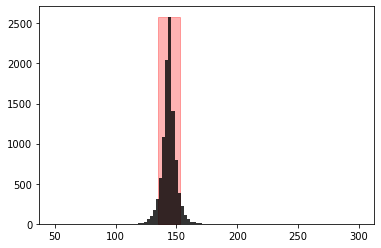

In [395]:
binBoundaries = np.linspace(50,300,100)
ci = norm(*norm.fit(noisySums)).interval(0.90)  
height, bins, patches = plt.hist(noisySums, alpha=0.8, bins = binBoundaries, color = 'k')
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='r', alpha=0.3) 

In [396]:
ci

(134.58591373663725, 153.34741055070467)

Yikes!  90% of the sums produced by the Laplace Mechanism fall within 10 around the true sum of 144.

Now lets go back and add Oski to the database with these same parameters $\epsilon$ = 4 and $\delta$ = 8

and run the same query with Oski added to the database.

In [463]:
col = baldingBears['Salmon']

In [466]:
noisySums = []
for i in range(10000):
    noisySum = ANON_SUM(col, mu, epsilon, u, l)  
    noisySums.append(noisySum)

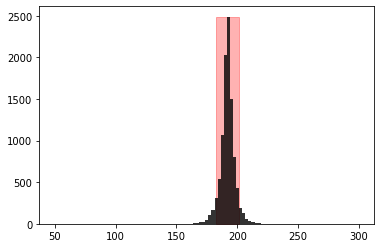

In [467]:
binBoundaries = np.linspace(50,300,100)
ci = norm(*norm.fit(noisySums)).interval(0.90)  
height, bins, patches = plt.hist(noisySums, alpha=0.8, bins = binBoundaries, color = 'k')
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='r', alpha=0.3) 

In [468]:
ci

(182.58998639102563, 201.4242605285819)

Instead of having almost $100$ points of padding to disguise Oski's membership as before with a very high sensitivity, here we see again a tight band of sum responses, $10$.  Looking at the difference between the two adjacent databases, one without Oski, one with Oski, there is a high probability of a lot of privacy leakage. 

#### What is the point?   

#### ...Sensitivity matters for ANON_SUM!

For an aggregation query like sum or average, the sensitivity parameter matters a lot if the database is to protect the membership of  outliers like Oski!  The upper and lower bound on the possible magnitude of the data, here the number of salmon eaten in a day must be large enough to protect everyone in the database.

### 2.5 Explore ANON_AVERAGE query with the Laplace Mechanism and the Balding Bears

In [781]:
# Advice is not to use this simple algorithm
def ANON_AVG_SIMPLE(col, epsilon, u, l):
    noisySum = ANON_SUM(col, epsilon, u, l)
    noisyCount = ANON_COUNT(col, epsilon, 1)
    return noisySum/noisyCount

In [794]:
def ANON_AVG_CLAMPING(col, epsilon, u, l):
    trueSum = np.sum(col) 
    trueCount = np.shape(col)[0] 
    sensitivity = u-l
    a = laplaceMechanism(trueSum, epsilon, sensitivity)/trueCount
    if a <= l:
        return l
    else:
        if a >= u:
            return u
        else: 
            return a

In [739]:
#Experimental Algorithm with Double Noise - Do Not Use
def ANON_AVG_CLAMPING_2(col, epsilon, u, l):
    noisySum = ANON_SUM(col, epsilon, u, l)
    sensitivity = 1
    noisyCount = ANON_COUNT(col, epsilon, sensitivity)
    #if noisyCount == 0:
      #  print("error") # complicated function need to code
    a = laplaceMechanism(noisySum, epsilon, sensitivity)/noisyCount
    if a <=  l:
        return l
    else:
        if a > u:
            return u
        else: 
            return a

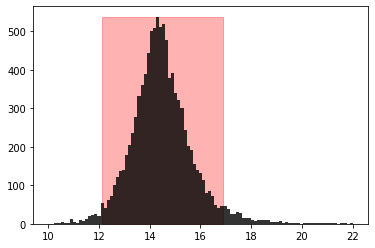

In [811]:
# Low privacy, low sensitivity, no Oski
epsilon = 4
u = 18
l = 10
col = baldingBears_no_Oski['Salmon']

noisyAvgs = []
for i in range(10000):
    noisyAvg = ANON_AVG_SIMPLE(col, epsilon, u, l)
    noisyAvgs.append(noisyAvg)
    
binBoundaries = np.linspace(10,22,100)
ci = norm(*norm.fit(noisyAvgs)).interval(0.95)  
height, bins, patches = plt.hist(noisyAvgs, alpha=0.8, bins = binBoundaries, color = 'k')
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='r', alpha=0.3) 

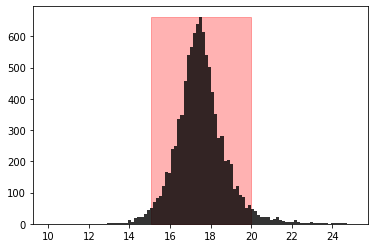

In [807]:
# Low privacy, low sensitivty, Oski
epsilon = 4
u = 18
l = 10
col = baldingBears['Salmon']noisyAvgs = []

for i in range(10000):
    noisyAvg = ANON_AVG_SIMPLE(col, epsilon, u, l)
    noisyAvgs.append(noisyAvg)
    
binBoundaries = np.linspace(10,25,100)
ci = norm(*norm.fit(noisyAvgs)).interval(0.95)  
height, bins, patches = plt.hist(noisyAvgs, alpha=0.8, bins = binBoundaries, color = 'k')
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='r', alpha=0.3)

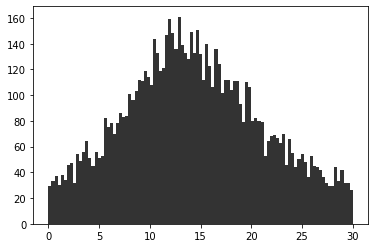

In [815]:
#Low Epsilon, low sensitivity, no Oski
epsilon = 1
u = 50
l = 10
col = baldingBears_no_Oski['Salmon']

noisyAvgs = []
for i in range(10000):
    noisyAvg = ANON_AVG_SIMPLE(col, epsilon, u, l)
    noisyAvgs.append(noisyAvg)
    
binBoundaries = np.linspace(0,30,100)
ci = norm(*norm.fit(noisyAvgs)).interval(0.95)  
height, bins, patches = plt.hist(noisyAvgs, alpha=0.8, bins = binBoundaries, color = 'k')
#plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='r', alpha=0.3) 

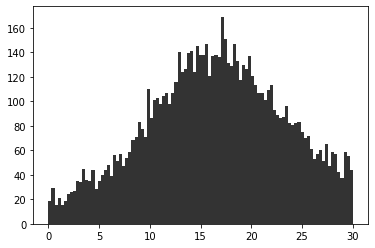

In [822]:
#Low Epsilon, low sensitivity, no Oski
epsilon = 1
u = 50
l = 10
col = baldingBears['Salmon']

noisyAvgs = []
for i in range(10000):
    noisyAvg = ANON_AVG_SIMPLE(col, epsilon, u, l)
    noisyAvgs.append(noisyAvg)
    
binBoundaries = np.linspace(0,30,100)
ci = norm(*norm.fit(noisyAvgs)).interval(0.95)  
height, bins, patches = plt.hist(noisyAvgs, alpha=0.8, bins = binBoundaries, color = 'k')
#plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='r', alpha=0.3) 

#### Impossible to distinguish one database from another given the averages.